In [2]:
import numpy as np

In [5]:
def inv_alr(x):
    out = np.exp(np.hstack((x, 0)))
    return out / np.sum(out)

In [65]:
Nx = 8
Ny = Nx

def get_weights(Nx, Ny):

    N = Nx*Ny
    # domain length
    L = 1
    centers = np.zeros((N, 2))
    for i in range(Nx):
        for j in range(Ny):
            centers[i + j*Nx, :] = np.array([(i + 0.5)*L/Nx, (j + 0.5)*L/Ny])
    c = 3
    alpha1 = c
    alpha2 = -c
    beta1 = c
    beta2 = -c

    weights = []
    mean_centers = np.mean(centers, axis=0)

    for center in centers:
        w1 = alpha1 * (center[0] - mean_centers[0]) \
             + beta1 * (center[1] - mean_centers[1])
        w2 = alpha2 * (center[0] - mean_centers[0]) \
            + beta2 * (center[1] - mean_centers[1])
        weights.append(inv_alr([w1, w2]))

    return weights


In [68]:
# plot weights
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt

colorscale = [[0, 'rgb(15, 32, 67)'], [0.5, 'rgb(122, 207, 221)'], [1, 'rgb(255,140,0)']]
w = np.array(get_weights(Nx, Ny))
w_index = 0

z_text = np.array(['' for i in range(Nx*Ny)]).reshape(Ny, Nx)
fig = ff.create_annotated_heatmap(w[:, w_index].reshape(Ny, Nx), colorscale=colorscale, 
                                  annotation_text=z_text, showscale=False, zmin = 0, zmax = 1)

fig.update_layout(
            paper_bgcolor='rgba(0, 0, 0, 0)',
            plot_bgcolor='rgba(0, 0, 0, 0)',
            )
fig.update_layout(width=400, height=400, autosize=False)
plt.savefig('weights_linear_1.png', bbox_inches="tight")

fig.show()

/home/riccardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/riccardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



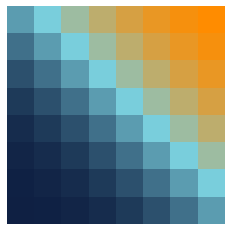

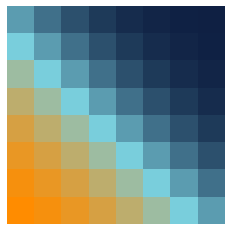

In [89]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt


colors = [(15, 32, 67), (122, 207, 221), (255,140,0)]
colors = [(c[0]/255, c[1]/255, c[2]/255) for c in colors]

newcmp = LinearSegmentedColormap.from_list('cmap', colors, 256)

w = np.array(get_weights(Nx, Ny))


fig, ax = plt.subplots()
im = ax.imshow(w[:, 0].reshape(Ny, Nx)[::-1, :], cmap=newcmp)
ax.set_axis_off()
plt.savefig('weights_linear_1.png', bbox_inches="tight")
fig.show()

fig, ax = plt.subplots()
im = ax.imshow(w[:, 1].reshape(Ny, Nx)[::-1, :], cmap=newcmp)
ax.set_axis_off()
plt.savefig('weights_linear_2.png', bbox_inches="tight")
fig.show()